In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np
import seaborn as sns

In [2]:
from datasets import load_dataset

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_IND = df[(df['job_country'] == 'India')].copy()

In [16]:
df_IND_Analysts = df_IND[df_IND['job_title_short'] == 'Data Analyst']

In [20]:
df_plot =df_IND_Analysts['job_location'].value_counts().head(10).to_frame()

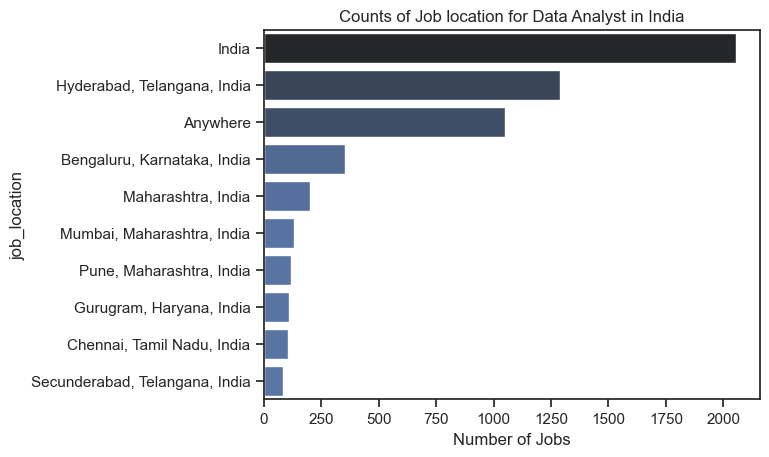

In [28]:
sns.set_theme(style='ticks')
plt.title('Counts of Job location for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.show()

In [ ]:
work_from_home = df['job_work_from_home'].value_counts()
job_no_degree = df['job_no_degree_mention'].value_counts()
job_health_insurance = df['job_health_insurance'].value_counts()

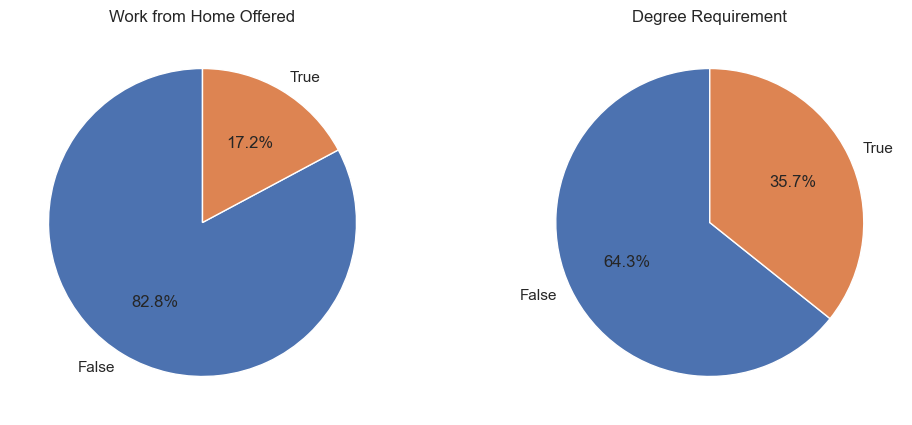

In [36]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_IND_Analysts[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

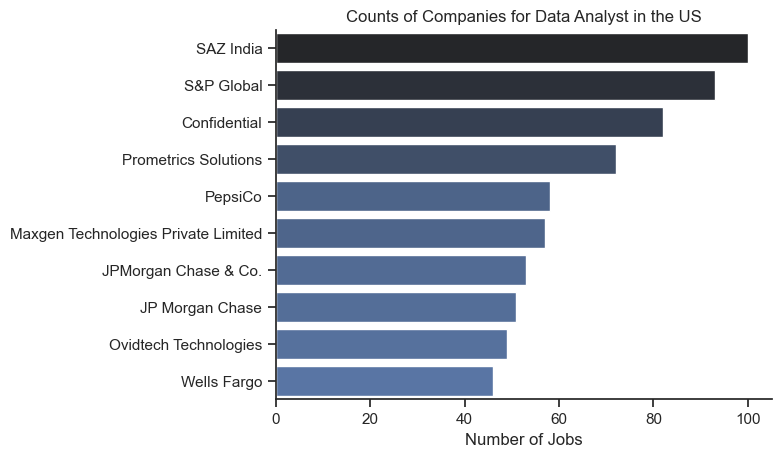

In [ ]:
df_plot = df_IND_Analysts['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()